In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_csv = 'ap2020_anonymized_cleaned.csv'
plt.style.use('bmh')

In [16]:
df = pd.read_csv(file_csv)

prijat_values = df['příjat'].unique()
prijat_values

array(['přes RZP/LSPP', 'z ambulance KK IKEM', 'bez doporučení',
       'od ambulantního lékaře', 'z jiné nemocnice', 'z oddělení KK IKEM',
       'z jiné kliniky IKEM'], dtype=object)

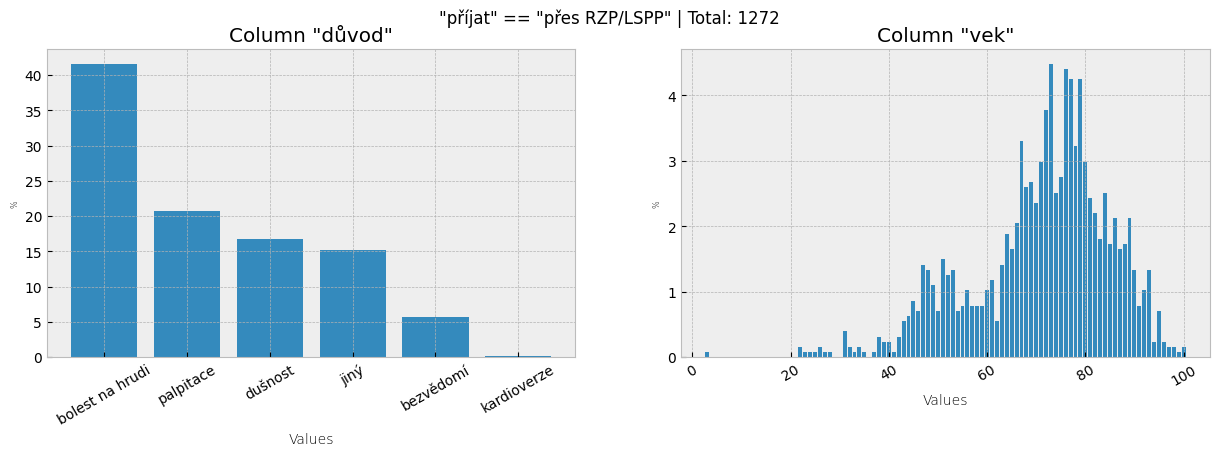

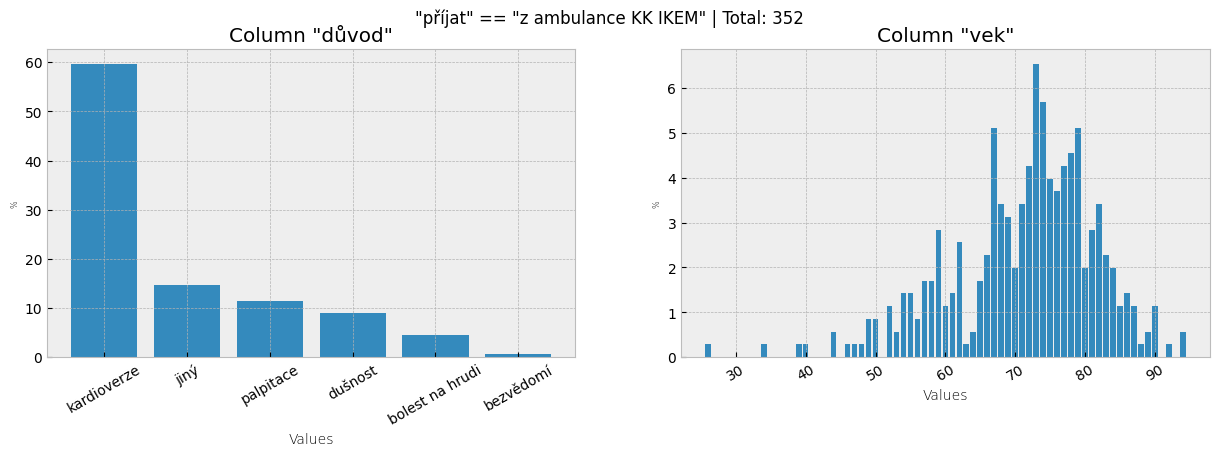

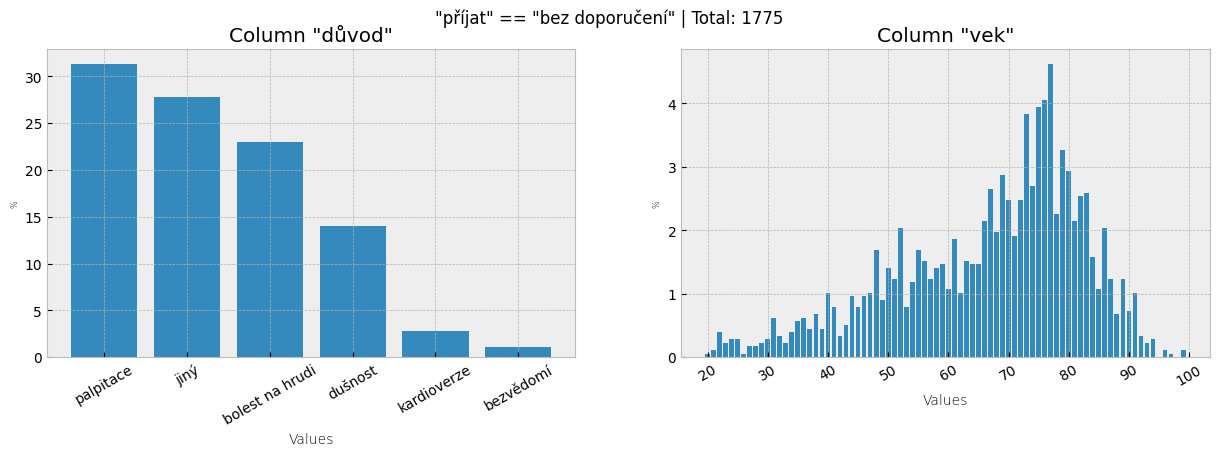

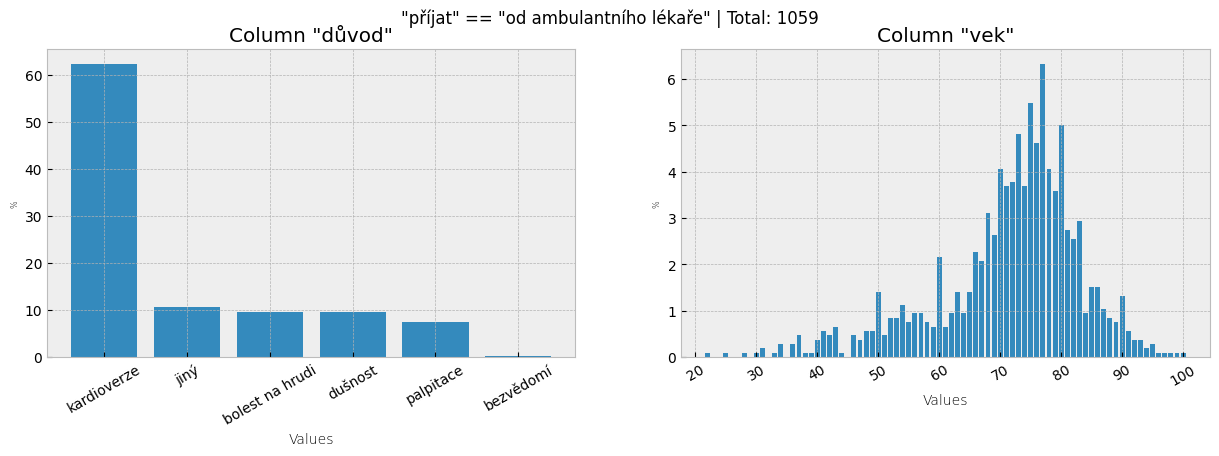

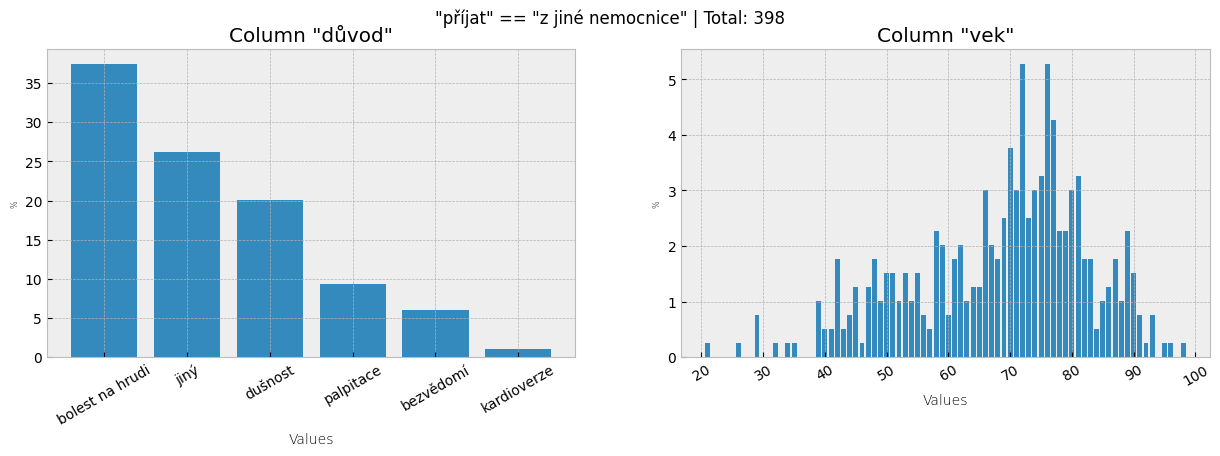

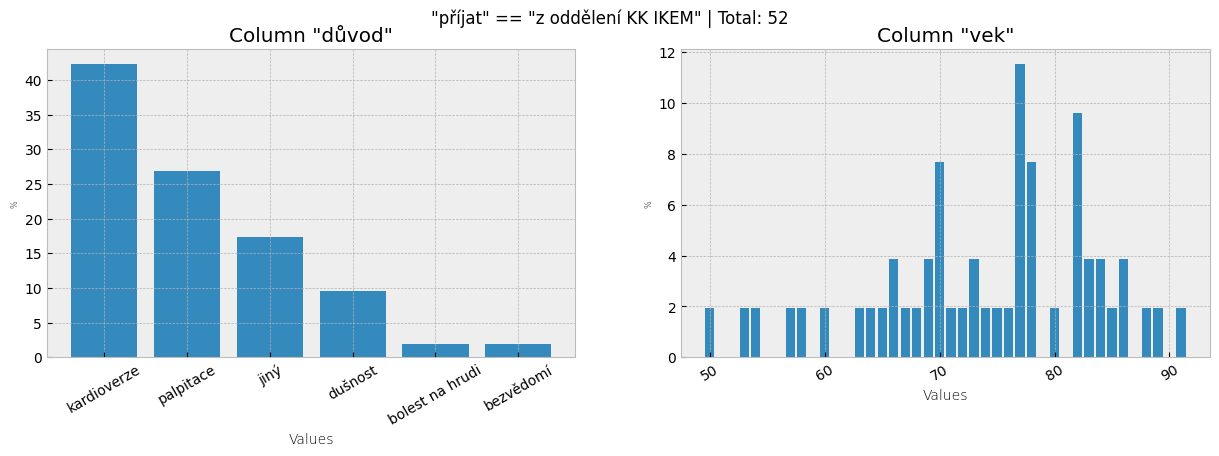

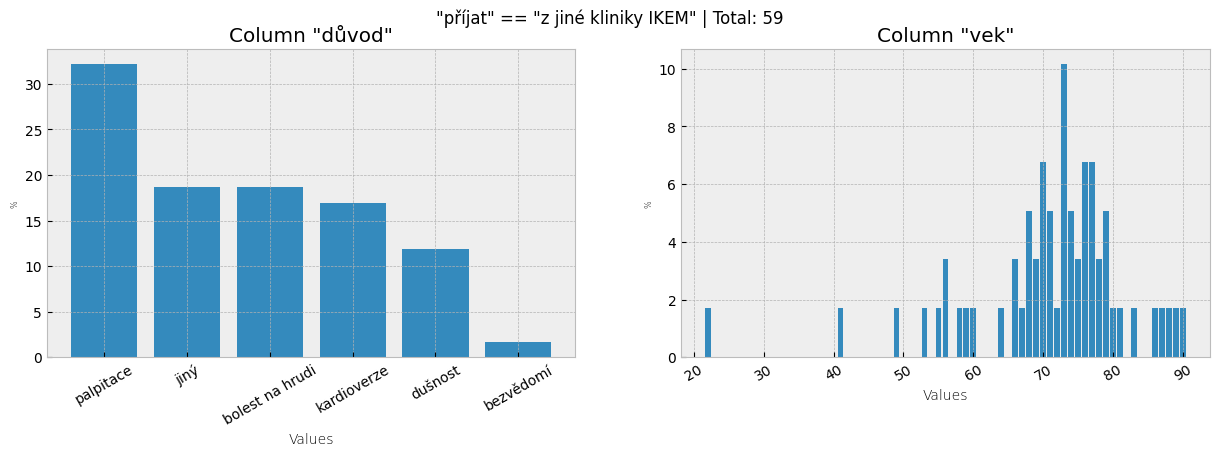

In [17]:
cat_cols = ['důvod', 'vek']

#fig, axes = plt.subplots(len(duvod_values), len(cat_cols))

for row_id, val in enumerate(prijat_values):
    fig, axes = plt.subplots(1, len(cat_cols))
    temp_df = df[df['příjat'] == val]
    fig.suptitle(f'"příjat" == "{val}" | Total: {len(temp_df)}')

    for col_idx, col in enumerate(cat_cols):
        values, counts = list(), list()
        value_counts = temp_df[col].value_counts()
        for row_idx in value_counts.keys():
            values.append( row_idx )
            counts.append( value_counts[row_idx] )
        
        # normalize to get percentage
        summed = sum(counts)
        counts = [ 100 * count / summed for count in counts ]

        ax = axes[col_idx]
        ax.set_title(f'Column "{col}"')
        ax.set_ylabel('%', fontweight='light', fontsize='xx-small')
        ax.set_xlabel('Values', fontweight='light')
        ax.bar(values, counts)
        ax.tick_params(
            axis='x',
            rotation=30,
            #horizontalalignment='right'
        )

        fig.set_size_inches(15, 4)
        fig.show()

        #print(f'Total admissions: {len(temp_df)}')